In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
penguins=sns.load_dataset("penguins")

In [3]:
print(penguins.head(10))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [4]:
print(penguins.shape)

(344, 7)


Understanding the Data


In [5]:
print(penguins.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [6]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [7]:
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [8]:
categorial_columns=penguins.select_dtypes(include=["object"]).columns
for col in categorial_columns:
    print(f"{col}:{penguins[col].unique()}")

species:['Adelie' 'Chinstrap' 'Gentoo']
island:['Torgersen' 'Biscoe' 'Dream']
sex:['Male' 'Female' nan]



Exploratory Data Analysis (EDA)


A. Univariate Analysis

<Figure size 1200x600 with 0 Axes>

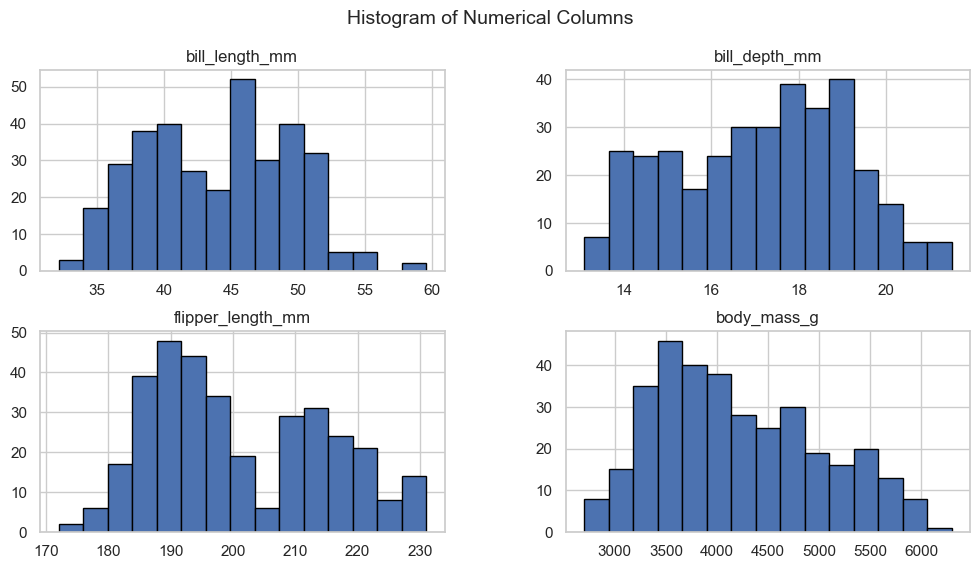

In [9]:
sns.set(style="whitegrid")
numerical_columns=penguins.select_dtypes(include=["float64","int64"]).columns
plt.figure(figsize=(12,6))
penguins[numerical_columns].hist(figsize=(12,6), bins=15, edgecolor="black")
plt.suptitle("Histogram of Numerical Columns", fontsize=14)
plt.show()

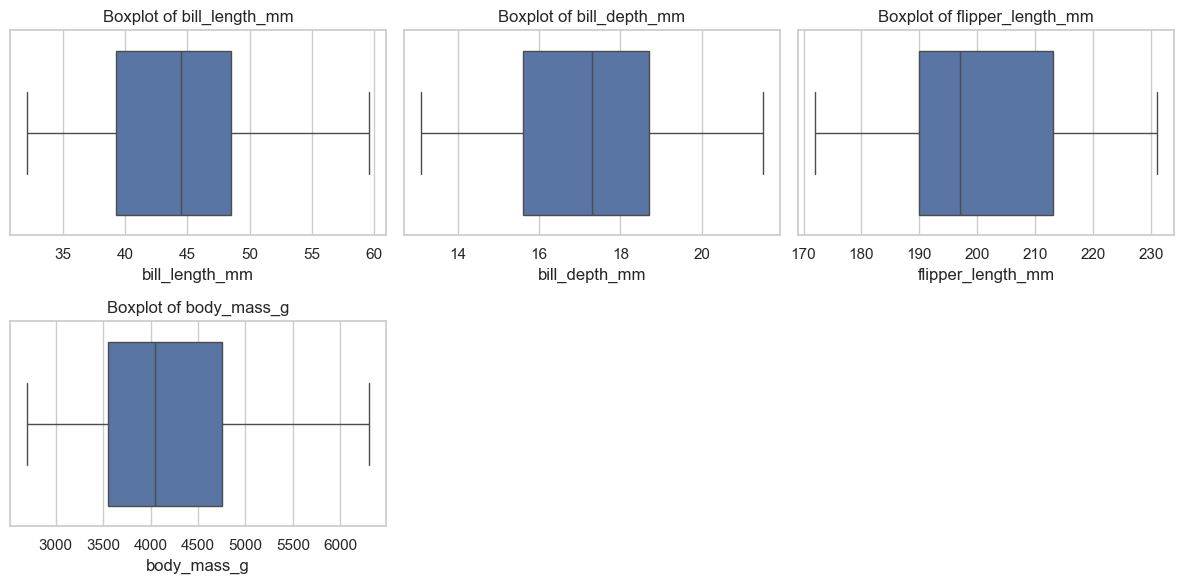

In [12]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=penguins[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


C:\Users\dhare\AppData\Local\Temp\ipykernel_19524\2882829054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=penguins[col], palette="pastel")
C:\Users\dhare\AppData\Local\Temp\ipykernel_19524\2882829054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=penguins[col], palette="pastel")
C:\Users\dhare\AppData\Local\Temp\ipykernel_19524\2882829054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=penguins[col], palette="pastel")


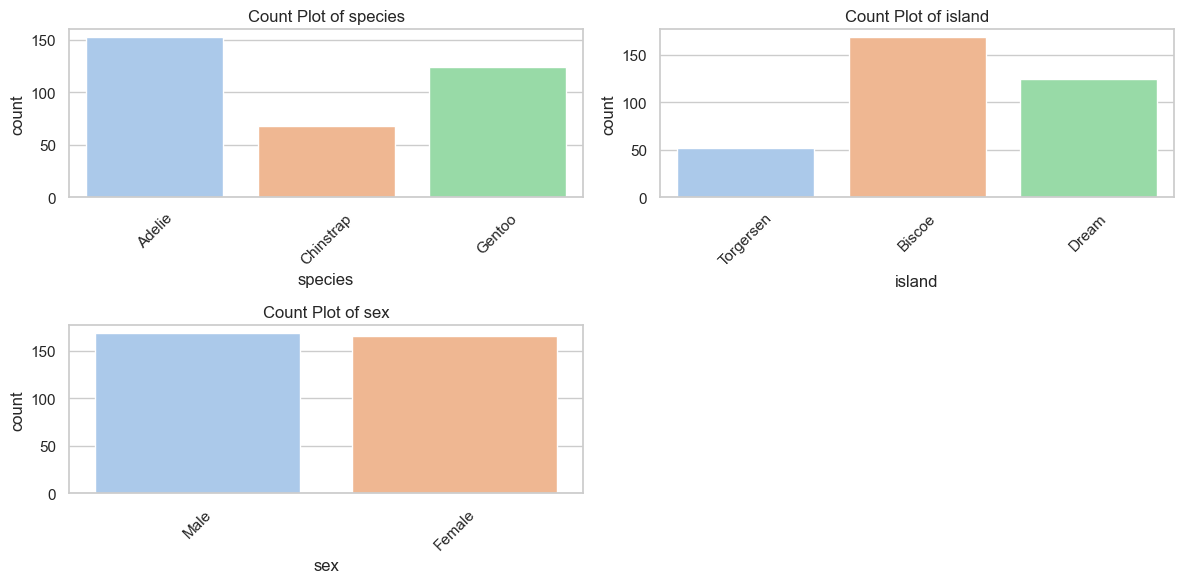

In [13]:
categorical_columns = penguins.select_dtypes(include=["object"]).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=penguins[col], palette="pastel")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print(penguins[numerical_columns].skew())

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


B. Bivariate Analysis

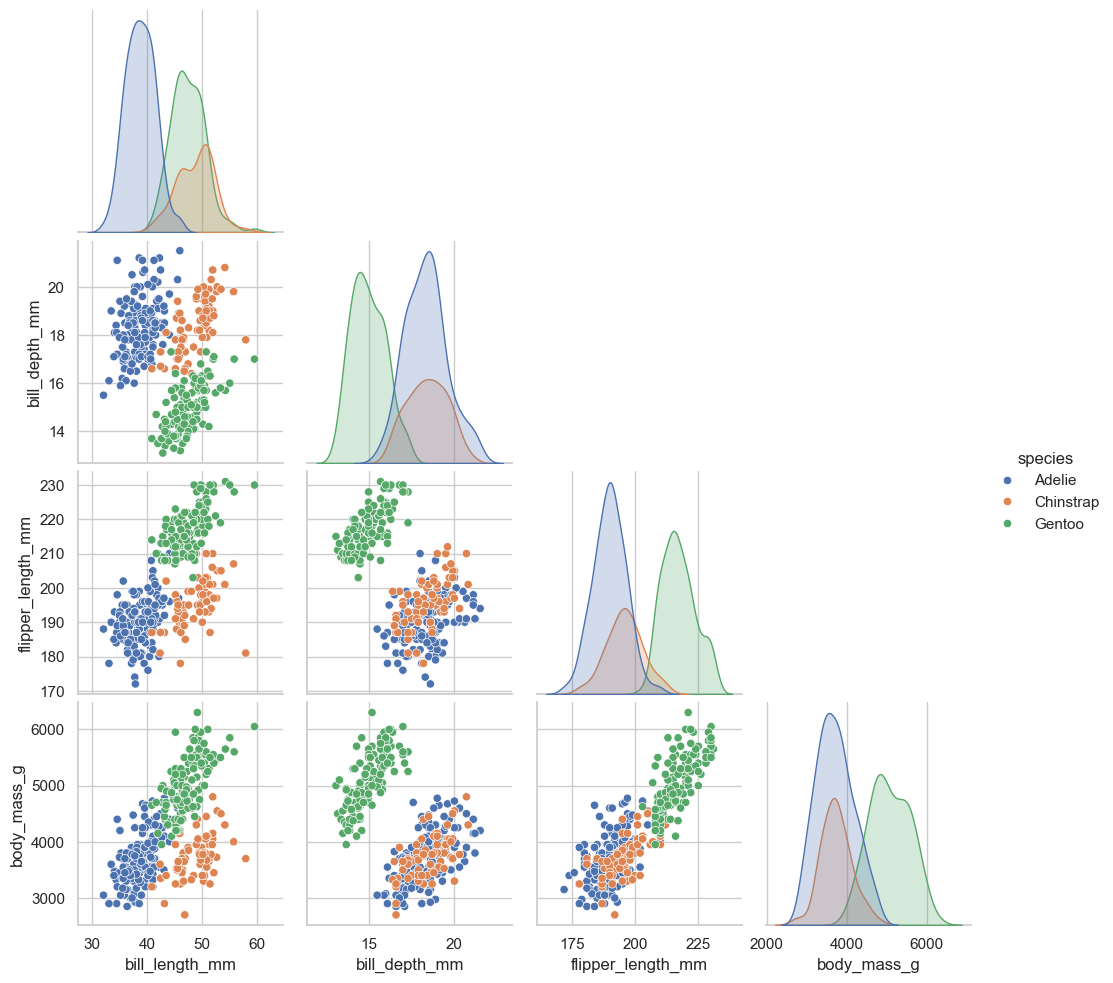

In [15]:
sns.pairplot(penguins, hue="species", diag_kind="kde", corner=True)
plt.show()

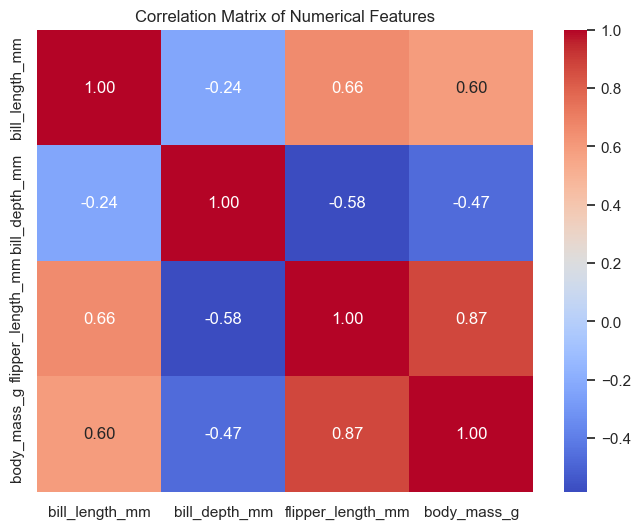

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(penguins.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


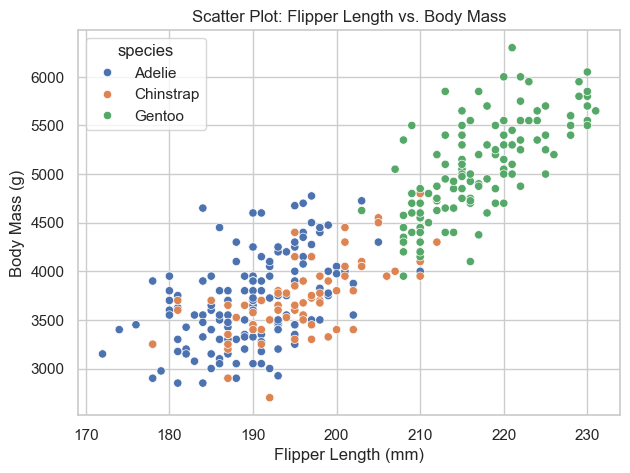

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=penguins)
plt.title("Scatter Plot: Flipper Length vs. Body Mass")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()


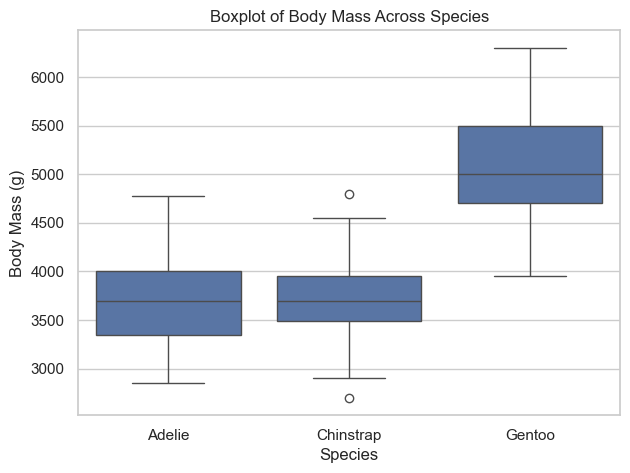

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x="species", y="body_mass_g", data=penguins)
plt.title("Boxplot of Body Mass Across Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()


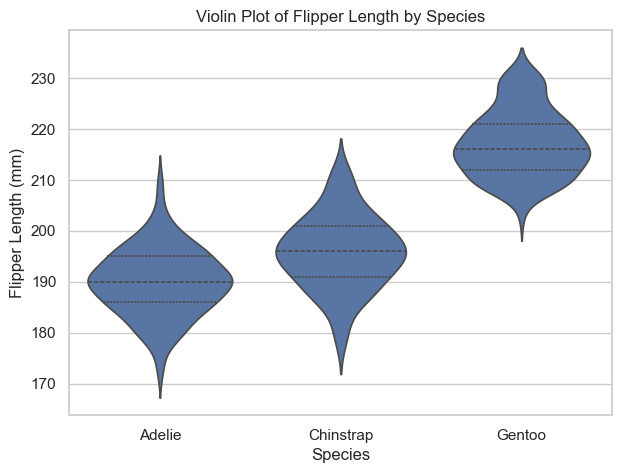

In [19]:
plt.figure(figsize=(7,5))
sns.violinplot(x="species", y="flipper_length_mm", data=penguins, inner="quartile")
plt.title("Violin Plot of Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()


Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
penguins.dropna(inplace=True)
X = penguins.drop(columns=["species"])
y = penguins["species"]

In [22]:

categorical_columns = X.select_dtypes(include=["object"]).columns

label_encoders = {}  
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (266, 6)
X_test shape: (67, 6)
y_train shape: (266,)
y_test shape: (67,)


Feature Scaling

A. Standardization (Z-score Scaling)

In [24]:
from sklearn.preprocessing import StandardScaler
numerical_columns=X.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[numerical_columns])

In [26]:
X_scaled_df=pd.DataFrame(X_scaled,columns=numerical_columns)

In [27]:
print(X_scaled_df.head())

     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  1.889392       -0.896042       0.780732          -1.426752    -0.568475   
1  1.889392       -0.822788       0.119584          -1.069474    -0.506286   
2  1.889392       -0.676280       0.424729          -0.426373    -1.190361   
3  1.889392       -1.335566       1.085877          -0.569284    -0.941606   
4  1.889392       -0.859415       1.747026          -0.783651    -0.692852   

        sex  
0  0.991031  
1 -1.009050  
2 -1.009050  
3 -1.009050  
4  0.991031  


B. Normalization (Min-Max Scaling)

In [28]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
X_normalized=minmax_scaler.fit_transform(X[numerical_columns])

In [29]:
X_normalized_df=pd.DataFrame(X_normalized, columns=numerical_columns)

In [30]:
print(X_normalized_df.head())

   island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
0     1.0        0.254545       0.666667           0.152542     0.291667  1.0
1     1.0        0.269091       0.511905           0.237288     0.305556  0.0
2     1.0        0.298182       0.583333           0.389831     0.152778  0.0
3     1.0        0.167273       0.738095           0.355932     0.208333  0.0
4     1.0        0.261818       0.892857           0.305085     0.263889  1.0
